In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

os.chdir('/content/drive/MyDrive/PR201910807/images/lab09/')

In [5]:
import utils

In [14]:

path1 = '/content/drive/MyDrive/PR201910807/images/lab09/pattern/vanila/dog_0.jpg'
path2 = '/content/drive/MyDrive/PR201910807/images/lab09/pattern/vanila/dog_1.jpg'

img_bgr1 = cv2.imread(path1)
img_bgr2 = cv2.imread(path2)
height, width, _ = img_bgr1.shape

img_gray1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2GRAY)

img_lbp_raw = np.zeros((height, width), np.uint8)
img_lbp_dark = np.zeros((height, width), np.uint8)

for i in range(1, height-1):
    for j in range(1, width-1):
        img_lbp_raw[i, j] = utils.lbp_algorithm(img_gray1, i, j, False)
        img_lbp_dark[i, j] = utils.lbp_algorithm(img_gray2, i, j, False)

cv2_imshow(img_bgr1)
cv2_imshow(img_bgr2)
cv2_imshow(img_lbp_raw)
cv2_imshow(img_lbp_dark)

Output hidden; open in https://colab.research.google.com to view.

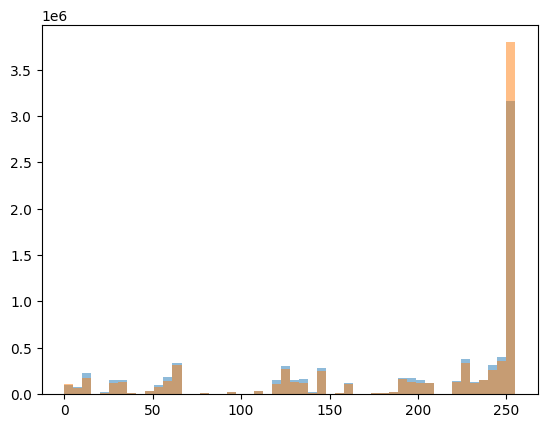

In [15]:
plt.hist(img_lbp_raw.flatten(), bins=50, alpha=.5);
plt.hist(img_lbp_dark.flatten(), bins=50, alpha=.5);

In [16]:

path1 = '/content/drive/MyDrive/PR201910807/images/lab09/pattern/vanila/dog_0.jpg'
path2 = '/content/drive/MyDrive/PR201910807/images/lab09/pattern/vanila/dog_2.jpg'
img_bgr1 = cv2.imread(path1)
img_bgr2 = cv2.imread(path2)
height, width, _ = img_bgr1.shape

img_gray1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2GRAY)

img_lbp_raw = np.zeros((height, width), np.uint8)
img_lbp_rotate = np.zeros((height, width), np.uint8)

for i in range(1, height-1):
    for j in range(1, width-1):
        img_lbp_raw[i, j] = utils.lbp_algorithm(img_gray1, i, j, False)
        img_lbp_rotate[i, j] = utils.lbp_algorithm(img_gray2, i, j, False)

cv2_imshow(img_bgr1)
cv2_imshow(img_bgr2)
cv2_imshow(img_lbp_raw)
cv2_imshow(img_lbp_rotate)

Output hidden; open in https://colab.research.google.com to view.

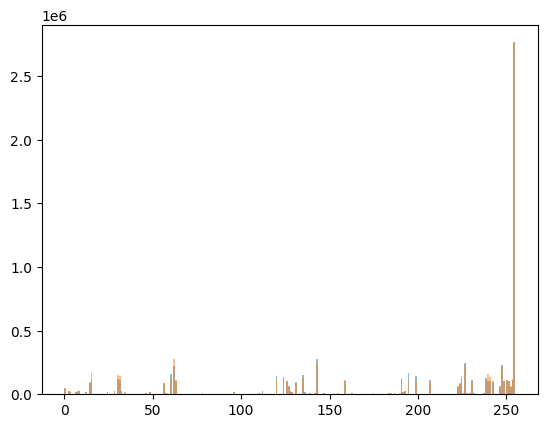

In [17]:
plt.hist(img_lbp_raw.flatten(), bins=256, alpha=.5);
plt.hist(img_lbp_rotate.flatten(), bins=256, alpha=.5);

In [18]:
path1 = '/content/drive/MyDrive/PR201910807/images/lab09/pattern/vanila/dog_0.jpg'
path2 = '/content/drive/MyDrive/PR201910807/images/lab09/pattern/vanila/dog_2.jpg'
img_bgr1 = cv2.imread(path1)
img_bgr2 = cv2.imread(path2)
height, width, _ = img_bgr1.shape

img_gray1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2GRAY)

img_lbp_raw = np.zeros((height, width), np.uint8)
img_lbp_rotate = np.zeros((height, width), np.uint8)

for i in range(1, height-1):
    for j in range(1, width-1):
        img_lbp_raw[i, j] = utils.lbp_algorithm(img_gray1, i, j, True)
        img_lbp_rotate[i, j] = utils.lbp_algorithm(img_gray2, i, j, True)

cv2_imshow(img_bgr1)
cv2_imshow(img_bgr2)
cv2_imshow(img_lbp_raw)
cv2_imshow(img_lbp_rotate)

Output hidden; open in https://colab.research.google.com to view.

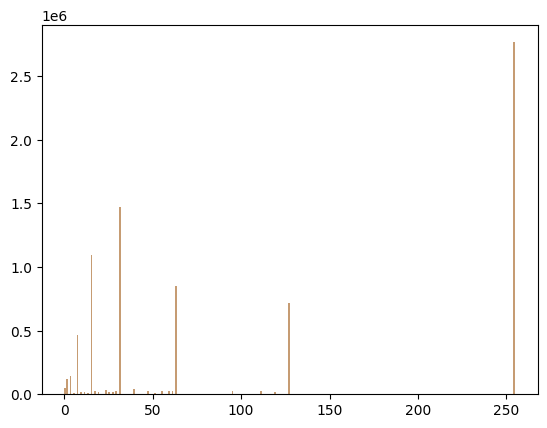

In [19]:
plt.hist(img_lbp_raw.flatten(), bins=256, alpha=.5);
plt.hist(img_lbp_rotate.flatten(), bins=256, alpha=.5);

# 비슷한 질감 찾기

In [20]:
inputpath = '/content/drive/MyDrive/PR201910807/images/lab09/pattern/train/'
filelist = os.listdir(inputpath)

pattern_dict = []

for filename in filelist:
  img = cv2.imread(inputpath+filename)
  img_hist = utils.img2histo(img)
  pattern_dict.append([filename, img_hist])

In [21]:
inputpath = '/content/drive/MyDrive/PR201910807/images/lab09/pattern/test/03_0.png'
test = cv2.imread(inputpath)
test_histo = utils.img2histo(test)

for onehist in pattern_dict:
  rmse = np.sqrt(np.mean((onehist[1]-test_histo)**2))
  print(onehist[0], rmse)

lbp01_1.png 165.34738
lbp03_1.png 19.320892
lbp02_1.png 117.88275


# Face Recognition

In [22]:
inputpath = '/content/drive/MyDrive/PR201910807/images/lab09/face_recognition/'
outputpath = '/content/drive/MyDrive/PR201910807/images/lab09/face_recognition_out/'

filelist = os.listdir(inputpath)

/content/drive/MyDrive/PR201910807/images/lab09/face_recognition/faker1.jpg


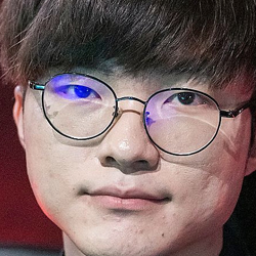

/content/drive/MyDrive/PR201910807/images/lab09/face_recognition/faker2.jpg


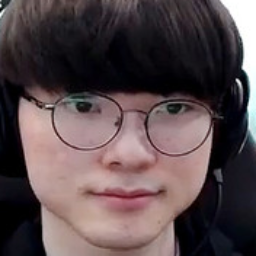

/content/drive/MyDrive/PR201910807/images/lab09/face_recognition/karina1.jpg


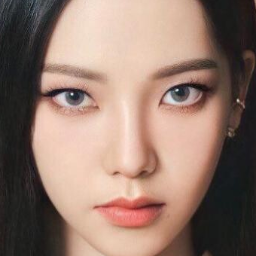

/content/drive/MyDrive/PR201910807/images/lab09/face_recognition/karina2.jpg


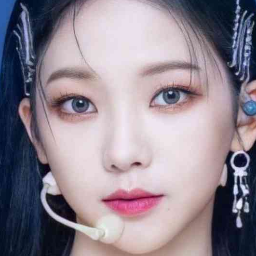

/content/drive/MyDrive/PR201910807/images/lab09/face_recognition/tom1.jpg


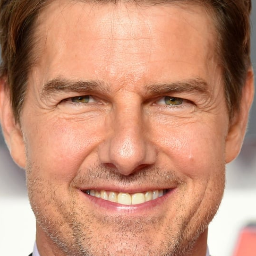

/content/drive/MyDrive/PR201910807/images/lab09/face_recognition/matt2.jpg


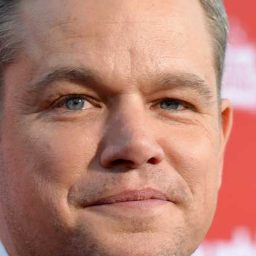

/content/drive/MyDrive/PR201910807/images/lab09/face_recognition/matt1.jpg


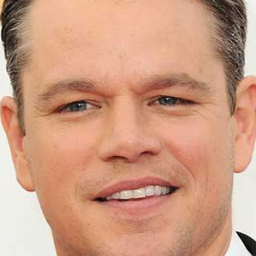

/content/drive/MyDrive/PR201910807/images/lab09/face_recognition/tom2.jpg


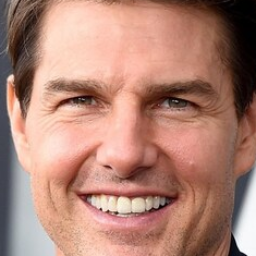

In [23]:
for filename in filelist:
  print(inputpath+filename)
  img = cv2.imread(inputpath+filename)

  # Convert into grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Load the cascade
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  # Detect faces
  faces = face_cascade.detectMultiScale(gray, 1.1, 4)

  # crop the faces (first detection only)
  for (x, y, w, h) in [faces[0]]:
      faces = img[y:y + h, x:x + w]
      # resize (optional)
      faces = cv2.resize(faces, (256,256))
      cv2_imshow(faces)
      cv2.imwrite(outputpath+filename, faces)


In [25]:
## Patch로 나누지 않을 경우

inputpath = '/content/drive/MyDrive/PR201910807/images/lab09/face_recognition_out/tom1.jpg'
tom1 = cv2.imread(inputpath)
inputpath = '/content/drive/MyDrive/PR201910807/images/lab09/face_recognition_out/faker1.jpg'
faker1 = cv2.imread(inputpath)
inputpath = '/content/drive/MyDrive/PR201910807/images/lab09/face_recognition_out/matt1.jpg'
matt1 = cv2.imread(inputpath)
inputpath = '/content/drive/MyDrive/PR201910807/images/lab09/face_recognition_out/karina1.jpg'
karina1 = cv2.imread(inputpath)

tom_histo = utils.img2histo(tom1)
faker_histo = utils.img2histo(faker1)
matt_histo = utils.img2histo(matt1)
karina_histo = utils.img2histo(karina1)

In [26]:
inputpath = '/content/drive/MyDrive/PR201910807/images/lab09/face_recognition_out/faker2.jpg'
test = cv2.imread(inputpath)

test_histo = utils.img2histo(test)

for onehist in pattern_dict:
  rmse = np.sqrt(np.mean((onehist[1]-test_histo)**2))
  print(onehist[0], rmse)

lbp01_1.png 1009.66595
lbp03_1.png 1124.4329
lbp02_1.png 1144.2522


In [27]:
## Patch로 나눌 경우

inputpath = '/content/drive/MyDrive/PR201910807/images/lab09/face_recognition_out/tom1.jpg'
tom1 = cv2.imread(inputpath)
inputpath = '/content/drive/MyDrive/PR201910807/images/lab09/face_recognition_out/faker1.jpg'
faker1 = cv2.imread(inputpath)
inputpath = '/content/drive/MyDrive/PR201910807/images/lab09/face_recognition_out/matt1.jpg'
matt1 = cv2.imread(inputpath)
inputpath = '/content/drive/MyDrive/PR201910807/images/lab09/face_recognition_out/karina1.jpg'
karina1 = cv2.imread(inputpath)

tom_histo = utils.img2histo_patch(tom1, 8)
faker_histo = utils.img2histo_patch(faker1, 8)
matt_histo = utils.img2histo_patch(matt1, 8)
karina_histo = utils.img2histo_patch(karina1, 8)

In [32]:
inputpath = '/content/drive/MyDrive/PR201910807/images/lab09/face_recognition_out/karina2.jpg'
test = cv2.imread(inputpath)

test_histo = utils.img2histo_patch(test, 8)


print("TOM:{}".format(np.sqrt(np.mean((tom_histo-test_histo)**2))))
print("FAKER:{}".format(np.sqrt(np.mean((tom_histo-test_histo)**2))))
print("MATT:{}".format(np.sqrt(np.mean((tom_histo-test_histo)**2))))
print("KARINA:{}".format(np.sqrt(np.mean((tom_histo-test_histo)**2))))

TOM:13.059967233520343
FAKER:13.059967233520343
MATT:13.059967233520343
KARINA:13.059967233520343
